In [ ]:
!pip install gdown


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import ipywidgets as widgets
from IPython.display import display, clear_output
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
!gdown https://drive.google.com/uc?id=14rJfENi_TsJPLG-yhamJsAy1dJV4HMsb


Downloading...
From: https://drive.google.com/uc?id=14rJfENi_TsJPLG-yhamJsAy1dJV4HMsb
To: /content/interactions_processed.csv
100% 52.4M/52.4M [00:00<00:00, 105MB/s] 


In [ ]:
!gdown https://drive.google.com/uc?id=1rKl_ps5pF5ZlTSdLp7qXO6PB5bV-vM8r

Downloading...
From: https://drive.google.com/uc?id=1rKl_ps5pF5ZlTSdLp7qXO6PB5bV-vM8r
To: /content/users_processed.csv
100% 31.9M/31.9M [00:00<00:00, 121MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1krjM7StXXbnUjgBEumuYoZfuev8zP-zz

Downloading...
From: https://drive.google.com/uc?id=1krjM7StXXbnUjgBEumuYoZfuev8zP-zz
To: /content/items_processed.csv
100% 32.1M/32.1M [00:00<00:00, 78.4MB/s]



# A/B-тестирование рекомендательных систем


<a id="1"></a>
## 1. Введение в A/B-тестирование

### 1.1 Что такое A/B-тестирование?

**A/B-тестирование** — это рандомизированный контролируемый эксперимент для сравнения двух версий системы с целью определения, какая из них показывает лучшие результаты по заданным метрикам.

```
Группа A (контрольная) → Текущая система рекомендаций
Группа B (тестовая)   → Новая система рекомендаций
```

### 1.2 Зачем нужно A/B-тестирование в рекомендательных системах?

| Аспект | Без A/B-тестирования | С A/B-тестированием |
|--------|---------------------|-------------------|
| **Принятие решений** | Субъективные мнения | Data-driven подход |
| **Риски** | Высокий риск ухудшения метрик | Контролируемый риск |
| **Измерение эффекта** | Качественные оценки | Количественные метрики |
| **Масштабирование** | Сложно обосновать | Четкие бизнес-кейсы |

### 1.3 Процесс A/B-тестирования


**Гипотеза** → **Эксперимент** → **Сбор данных** → **Анализ** → **Вывод**

----------------

<a id="2"></a>
## 2. Особенности A/B-тестов в рекомендательных системах

### 2.1 Уникальные трудности A/B-тестов в рекомендательных системах

**1. Эффект сетевого взаимодействия**
```python
# Пользователи влияют друг на друга
user_network_effect = "Рекомендации для User A → Поведение User A → Рекомендации для User B"
```

**2. Проблема многорукого бандита**
- **Exploration**: Тестирование новых алгоритмов
- **Exploitation**: Использование проверенных подходов
- **Баланс**: Динамическое распределение трафика

**3. Долгосрочные эффекты vs Краткосрочные метрики**
```python
short_term_metrics = ["CTR", "Conversion Rate"]
long_term_metrics = ["Retention", "LTV"]
```

**4. Холодный старт**
- Новые пользователи без истории
- Новый контент без взаимодействий
- Стратегии обработки cold start

### 2.2 Архитектура рекомендательных систем для A/B-тестирования

```python
class RecommendationABTest:
    def __init__(self):
        self.control_algorithm = "Collaborative Filtering"
        self.treatment_algorithm = "Neural Matrix Factorization"
        self.metrics_tracker = ABMetricsTracker()
    
    def get_recommendations(self, user_id, group):
        if group == 'A':
            return self.control_model.predict(user_id)
        else:
            return self.treatment_model.predict(user_id)
```



### 2.3 Типы тестов для рекомендательных систем

| Тип теста | Цель | Пример | Ключевые метрики | Длительность | Особенности |
|----------|------|--------|-----------------|-------------|-------------|
| **Алгоритмический** | Сравнение core-алгоритмов рекомендаций | Matrix Factorization vs. Neural Networks vs. Graph Algorithms | CTR, Conversion Rate, Recall@K, NDCG, Coverage | 2-4 недели | Требует большой трафик, сложная интерпретация |
| **Интерфейсный (UI/UX)** | Тестирование представления рекомендаций | Расположение карусели, размер карточек, количество элементов | Click-through Rate, Scroll Depth, Engagement Time | 1-2 недели | Быстрые результаты, легко интерпретировать |
| **Бизнес-правила** | Проверка бизнес-логики и фильтров | Фильтрация по новизне, географические ограничения, ценовые сегменты | Conversion Rate, Revenue per User, Diversity Metrics | 2-3 недели | Часто требует сегментного анализа |
| **Гибридный** | Комбинация нескольких изменений | Новый алгоритм + измененный UI | Композитные метрики, Business KPIs | 3-4 недели | Сложно выделить вклад каждого изменения |
| **Стратегический** | Тестирование разных подходов к рекомендациям | Collaborative Filtering vs. Content-Based vs. Hybrid | User Retention, LTV, Session Duration | 4-8 недели | Требует измерения долгосрочных эффектов |
| **Персонализированный** | Тестирование для разных сегментов пользователей | Разные алгоритмы для новых и постоянных пользователей | Метрики сегментов, Activation Rate | 2-3 недели | Необходима стратификация по сегментам |



----------------
# <a id="3"></a>
 ## 3. Метрики для оценки рекомендательных систем

### 3.1 Классификация метрик

| Категория | Метрики | Описание | Когда использовать |
|-----------|---------|----------|-------------------|
| **Вовлеченность** | CTR, Conversion Rate, Время на платформе, Глубина просмотра | Измеряют активность пользователей | Общая эффективность системы, пользовательская активность |
| **Релевантность** | Precision@K, Recall@K, NDCG, MAP, MRR | Оценивают соответствие рекомендаций интересам | Качество подбора контента, точность алгоритмов |
| **Диверсификация** | Coverage, Serendipity, Novelty, Diversity | Измеряют разнообразие и новизну | Широта рекомендаций, открытие нового контента |
| **Бизнес-метрики** | Retention, LTV, ARPU, Churn Rate, Revenue | Оценивают коммерческую эффективность | Бизнес-воздействие, монетизация |
| **Технические** | Latency, Throughput, Uptime, Scalability | Измеряют производительность системы | Стабильность работы, пользовательский опыт |

### 3.2 Выбор метрик: практические рекомендации

**Первичная метрика (главная):**
- Одна основная метрика для принятия решения
- Должна быть чувствительной к изменениям
- Пример: Conversion Rate

**Вторичные метрики (второстепенные):**
- Помогают понять побочные эффекты
- Пример: Coverage, Serendipity

**Защитные метрики:**
- Не должны ухудшаться
- Пример: Время ответа системы, Стабильность

### 3.3 Offline vs Online метрики

**Offline-метрики:**
- *Преимущества*:  
    быстрые итерации, низкая стоимость, масштабируемость
- *Недостатки*:   
    не учитывают реальное поведение, нет долгосрочных эффектов

**Online-метрики (A/B тесты):**
- *Преимущества*:   
    реальное поведение пользователей, долгосрочные эффекты
- *Недостатки*:  
    дорого, медленно, риск для пользователей

----------------

# <a id="4"></a>
 ## 4. Дизайн эксперимента

### 4.1 Формулировка гипотезы

**Правильный формат:**
```
Если мы [ВНЕДРИМ ИЗМЕНЕНИЕ X],
то [МЕТРИКА Y] [УВЕЛИЧИТСЯ/УМЕНЬШИТСЯ] на [Z%],
потому что [ОБОСНОВАНИЕ]
```

**Пример для рекомендательной системы:**
"Если мы заменим алгоритм коллаборативной фильтрации на Deep Learning модель, то Conversion Rate увеличится на 15%, потому что нейросети лучше учитывают сложные нелинейные взаимодействия между пользователями и контентом."

### 4.2 Определение единиц анализа

| Единица | Преимущества | Недостатки |
|---------|--------------|------------|
| **user_id** | Избегает загрязнения данных | Требует больше пользователей |
| **session_id** | Быстрее набор данных | Возможны пересечения между сессиями |
| **request_id** | Максимальная точность | Сложная реализация |

**Рекомендация:** используйте **user_id** как единицу рандомизации для рекомендательных систем.


 ### 4.3 Формулы для расчета размера выборки

| Параметр | Обозначение | Типичное значение | Описание |
|----------|-------------|------------------|----------|
| **MDE (Minimum Detectable Effect)** | δ | 5-15% | Минимальное изменение, которое мы хотим обнаружить |
| **α (Уровень значимости)** | α | 0.05 | Вероятность ложноположительного результата |
| **β (Статистическая мощность)** | β | 0.2 | Вероятность не обнаружить реальный эффект |
| **σ (Стандартное отклонение)** | σ | Зависит от метрики | Разброс значений метрики в популяции |
| **Размер выборки (n)** | n | Рассчитывается | Количество наблюдений на группу |

**Формула для расчета размера выборки (для пропорций):**

$$n = 2 * (Z_{1-α/2} + Z_{1-β})² * p(1-p) / δ²$$

где:
- $Z_{1-α/2}$ = 1.96 (для α=0.05)
- $Z_{1-β}$ = 0.84 (для β=0.2)
- $p$ - базовая конверсия
- $δ$ - минимальный детектируемый эффект

### 4.4 Расчет длительности теста

**Факторы влияния:**
1. **Размер эффекта (MDE)** - минимальное детектируемое изменение
2. **Статистическая мощность** - вероятность обнаружить эффект (обычно 80%)
3. **Уровень значимости** - вероятность ложного срабатывания (обычно 5%)
4. **Базовый уровень метрики** - текущее значение метрики
5. **Трафик** - количество пользователей в день

 ```
 Дней = (Размер выборки на группу × 2) / (Ежедневный трафик × Доля трафика в тесте)
 ```

### 4.5 Избегайте этих ошибок!

✕  **Слишком короткий тест** - не учитывает недельную цикличность  
✕  **Слишком маленький MDE** - требует огромных выборок  
✕  **Изменение параметров во время теста** - нарушает чистоту эксперимента  
✕  **Недостаточная мощность** - высокий шанс пропустить реальный эффект




----------

# <a id="5"></a>
## 5. Статистические основы

### 5.1 Нулевая и альтернативная гипотезы

- **H₀ (Нулевая гипотеза)**: Между группами A и B нет различий
- **H₁ (Альтернативная гипотеза)**: Между группами A и B есть значимые различия

### 5.2 P-value и уровень значимости

**P-value** - вероятность получить наблюдаемые результаты при условии, что H₀ верна.

- **p < 0.05**: Отвергаем H₀ (статистически значимый результат)
- **p ≥ 0.05**: Не можем отвергнуть H₀


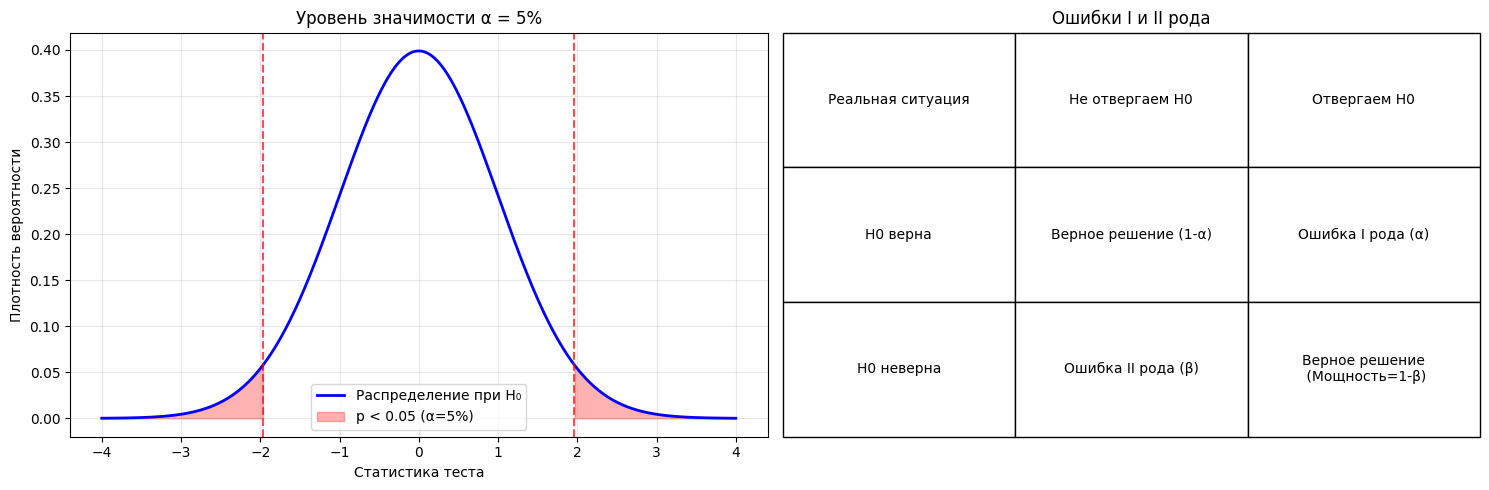

In [ ]:
def plot_p_value_explanation():
    """Визуализация концепции p-value"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # распределение при H0
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)

    ax1.plot(x, y, 'b-', linewidth=2, label='Распределение при H₀')
    ax1.fill_between(x[x > 1.96], y[x > 1.96], alpha=0.3, color='red', label='p < 0.05 (α=5%)')
    ax1.fill_between(x[x < -1.96], y[x < -1.96], alpha=0.3, color='red')
    ax1.axvline(1.96, color='red', linestyle='--', alpha=0.7)
    ax1.axvline(-1.96, color='red', linestyle='--', alpha=0.7)
    ax1.set_title('Уровень значимости α = 5%')
    ax1.set_xlabel('Статистика теста')
    ax1.set_ylabel('Плотность вероятности')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    errors_data = {
        'Реальная ситуация': ['H0 верна', 'H0 неверна'],
        'Не отвергаем H0': ['Верное решение (1-α)', 'Ошибка II рода (β)'],
        'Отвергаем H0': ['Ошибка I рода (α)', 'Верное решение\n (Мощность=1-β)']
    }

    errors_df = pd.DataFrame(errors_data)
    ax2.axis('off')
    table = ax2.table(cellText=errors_df.values,
                     colLabels=errors_df.columns,
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    ax2.set_title('Ошибки I и II рода')

    plt.tight_layout()
    plt.show()

plot_p_value_explanation()


 ### 5.3 Доверительные интервалы

 **Доверительный интервал** - это диапазон значений, который с заданной вероятностью (уровнем доверия) содержит истинное значение параметра популяции.

 - **95% доверительный интервал**: Если мы повторим эксперимент 100 раз, в 95 случаях интервал будет содержать истинное значение
 - **НЕ означает**: "С вероятностью 95% истинное значение находится в этом интервале"

 **Интерпретация:**
 - Интервал не включает 0 → Статистически значимый результат
 - Весь интервал в области положительных значений → Положительный эффект
 - Интервал пересекает 0 → Результат не значим


Визуализация доверительных интервалов


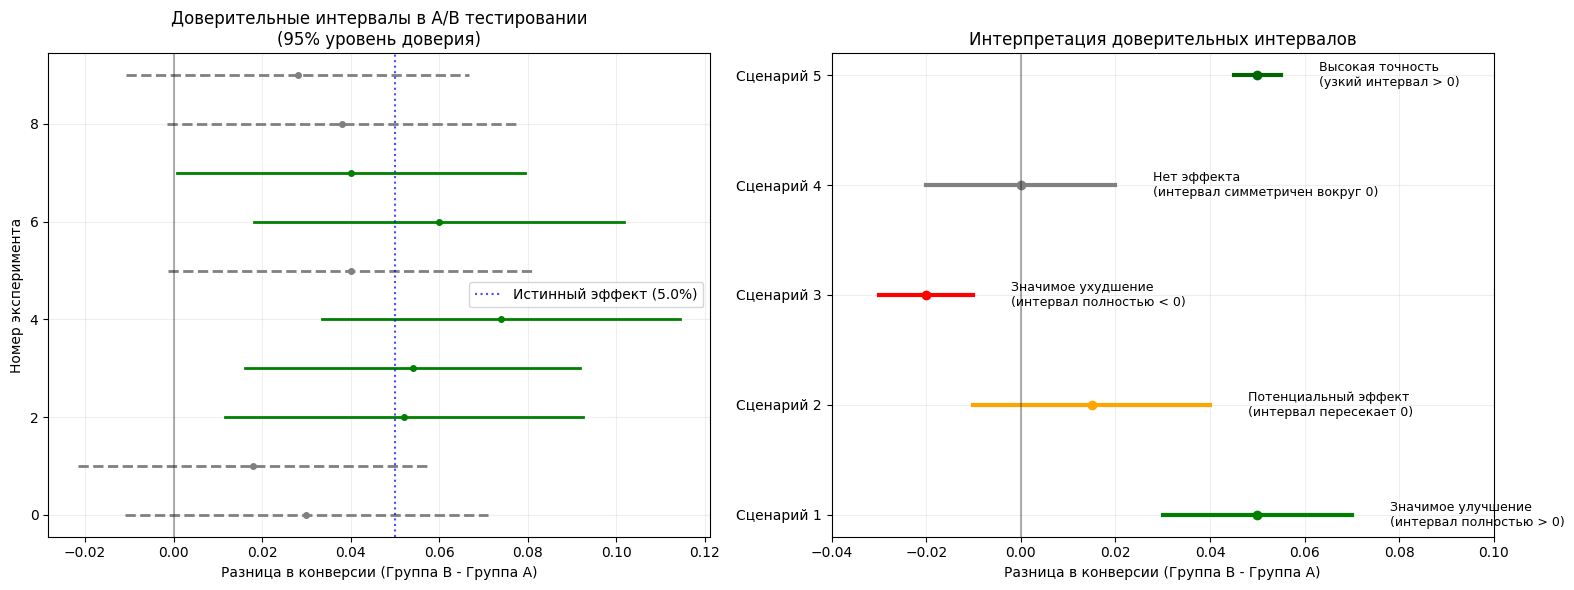

Правила интерпретации доверительных интервалов:

СИТУАЦИЯ                            ИНТЕРПРЕТАЦИЯ                            РЕКОМЕНДАЦИЯ                  
---------------------------------------------------------------------------------------------------------
Интервал полностью выше 0           Статистически значимое улучшение         Рассмотреть внедрение         
Интервал полностью ниже 0           Статистически значимое ухудшение         Отказаться от изменений       
Интервал включает 0                 Результат не статистически значим        Продолжить тестирование       
Узкий интервал вокруг 0             Высокая точность, нет эффекта            Искать другие улучшения       
Широкий интервал с положительным средним Неопределенность в оценке                Увеличить размер теста        


In [ ]:
def plot_clean_confidence_intervals():
    """Визуализация доверительных интервалов"""

    np.random.seed(42)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    n_experiments = 10
    true_effect = 0.05
    sample_size = 500

    for i in range(n_experiments):
        group_a = np.random.binomial(1, 0.10, sample_size)
        group_b = np.random.binomial(1, 0.10 + true_effect, sample_size)

        mean_a, mean_b = np.mean(group_a), np.mean(group_b)
        effect = mean_b - mean_a

        se = np.sqrt(mean_a*(1-mean_a)/sample_size + mean_b*(1-mean_b)/sample_size)
        ci_low = effect - 1.96 * se
        ci_high = effect + 1.96 * se

        if ci_low > 0:
            color = 'green'
            linestyle = '-'
            label = 'Значимое улучшение' if i == 0 else ""
        elif ci_high < 0:
            color = 'red'
            linestyle = '-'
            label = 'Значимое ухудшение' if i == 0 else ""
        else:
            color = 'gray'
            linestyle = '--'
            label = 'Незначимый результат' if i == 0 else ""

        ax1.plot([ci_low, ci_high], [i, i], color=color, linewidth=2, linestyle=linestyle)
        ax1.plot(effect, i, 'o', color=color, markersize=4)

    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax1.axvline(x=true_effect, color='blue', linestyle=':', alpha=0.7,
                label=f'Истинный эффект ({true_effect:.1%})')

    ax1.set_xlabel('Разница в конверсии (Группа B - Группа A)')
    ax1.set_ylabel('Номер эксперимента')
    ax1.set_title('Доверительные интервалы в A/B тестировании\n(95% уровень доверия)')
    ax1.legend()
    ax1.grid(True, alpha=0.2)

    scenarios = [
        (0.03, 0.07, 'Значимое улучшение\n(интервал полностью > 0)', 'green'),
        (-0.01, 0.04, 'Потенциальный эффект\n(интервал пересекает 0)', 'orange'),
        (-0.03, -0.01, 'Значимое ухудшение\n(интервал полностью < 0)', 'red'),
        (-0.02, 0.02, 'Нет эффекта\n(интервал симметричен вокруг 0)', 'gray'),
        (0.045, 0.055, 'Высокая точность\n(узкий интервал > 0)', 'darkgreen')
    ]

    for i, (ci_low, ci_high, label, color) in enumerate(scenarios):
        mean = (ci_low + ci_high) / 2
        ax2.plot([ci_low, ci_high], [i, i], color=color, linewidth=3)
        ax2.plot(mean, i, 'o', color=color, markersize=6)
        ax2.text(ci_high + 0.008, i, label, va='center', fontsize=9)

    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_xlabel('Разница в конверсии (Группа B - Группа A)')
    ax2.set_yticks(range(len(scenarios)))
    ax2.set_yticklabels([f'Сценарий {i+1}' for i in range(len(scenarios))])
    ax2.set_title('Интерпретация доверительных интервалов')
    ax2.grid(True, alpha=0.2)
    ax2.set_xlim(-0.04, 0.1)

    plt.tight_layout()
    plt.show()

print("Визуализация доверительных интервалов")
plot_clean_confidence_intervals()


def print_ci_interpretation_rules():

    print("Правила интерпретации доверительных интервалов:")

    rules = [
        ("Интервал полностью выше 0", "Статистически значимое улучшение", "Рассмотреть внедрение"),
        ("Интервал полностью ниже 0", "Статистически значимое ухудшение", "Отказаться от изменений"),
        ("Интервал включает 0", "Результат не статистически значим", "Продолжить тестирование"),
        ("Узкий интервал вокруг 0", "Высокая точность, нет эффекта", "Искать другие улучшения"),
        ("Широкий интервал с положительным средним", "Неопределенность в оценке", "Увеличить размер теста")
    ]

    print("\n{:<35} {:<40} {:<30}".format("СИТУАЦИЯ", "ИНТЕРПРЕТАЦИЯ", "РЕКОМЕНДАЦИЯ"))
    print("-" * 105)

    for situation, interpretation, recommendation in rules:
        print("{:<35} {:<40} {:<30}".format(situation, interpretation, recommendation))

print_ci_interpretation_rules()



 ### Что показывают доверительные интервалы:

 1. **Точность оценки** - узкий интервал = высокая точность
 2. **Статистическую значимость** - интервал не включает 0 = значимый результат  
 3. **Практическую значимость** - весь интервал в области значимых изменений
 4. **Неопределенность** - широкий интервал = большая неопределенность

 ###  Как использовать на практике:

 - **Принимайте решения** на основе всей информации интервала, а не только p-value
 - **Учитывайте ширину** интервала при оценке надежности результатов
 - **Сравнивайте интервалы** между группами, а не только средние значения
 - **Помните о многократныъ текстах** при сравнении многих интервалов

 ###  Частые ошибки:

 -  "95% вероятность, что истинное значение в интервале" (неверно!)
 -  Игнорирование ширины интервала
 -  Сравнение только средних без учета неопределенности
 -  Использование только 95% уровня без контекста


### 5.4 Статистические тесты для разных типов данных

| Тип данных | Тест | Условия применения |
|------------|------|-------------------|
| **Пропорции** | Z-test, Chi-square | Большие выборки, бинарные outcome |
| **Средние** | T-test | Непрерывные метрики, нормальное распределение |
| **Медианы** | Mann-Whitney U | Непрерывные метрики, ненормальное распределение |
| **Временные ряды** | CUPED | Уменьшение дисперсии, предпериодные данные |


--------------


# <a id="6"></a>
### 6. Когортный анализ в A/B-тестах

### 6.1 Зачем нужен когортный анализ в A/B-тестировании?

**Проблема:**
```
Средние метрики по всему тесту могут скрывать важные инсайты и маскировать разнонаправленные эффекты.
```

**Решение:**
```
Разбиваем пользователей на когорты и анализируем каждую группу отдельно.
```

 ### Типы когорт для A/B тестирования рекомендательных систем

| Тип когорты | Пример | Что показывает |
|-------------|--------|----------------|
| **По активности** | Новые пользователи (< 7 дней) vs Постоянные | Эффект на привлечение новых пользователей |
| **По демографии** | Возрастные группы: 18-25, 26-40, 41+ | Различия в восприятии по демографии |
| **По поведению** | Высокая/низкая частота просмотров | Влияние на лояльность разных сегментов |
| **По контенту** | Предпочитающие фильмы vs сериалы | Эффективность для разных типов контента |

### 6.3 Опасность эффекта Симпсона

**Эффект Симпсона** - когда тренд появляется в разных группах, но исчезает или меняется при их объединении.

**Пример из рекомендательных систем:**
- Новая система лучше для новых пользователей (+50%)
- Новая система хуже для постоянных пользователей (-5%)  
- В среднем: незначительное улучшение (+3%)

**Вывод:**
```
Без когортного анализа можно принять неверное решение и упустить возможности для сегментированного подхода!
```

### 6.4 Как связать когортный анализ с A/B-тестом


| Этап | Цель | Методы | Результат |
|------|------|--------|-----------|
|1. **Стратифицированная рандомизация** | Равномерное распределение когорт по группам | Блочная рандомизация, Стратификация по ключевым признакам | Сбалансированные группы A/B по всем сегментам |
|2. **Анализ результатов по когортам** | Выявление разнонаправленных эффектов | Сравнение метрик внутри каждой когорты, Статистические тесты по сегментам | Карта эффектов: какие сегменты выиграли/проиграли |
|3. **Сегментированные решения** | Оптимизация внедрения изменений | Анализ ROI по сегментам, Приоритизация когорт | Адаптивная стратегия внедрения для разных сегментов |

### 6.5 Практические примеры из рекомендательных систем

**Пример 1: Алгоритм для новых vs постоянных пользователей**
- Новые пользователи: Collaborative Filtering + Popular items
- Постоянные пользователи: Neural Networks + Personalization

**Пример 2: Географические особенности**
- Регион A: акцент на локальный контент
- Регион B: международный контент + субтитры

**Пример 3: Поведенческие паттерны**  
- Утренние пользователи: короткий контент
- Вечерние пользователи: полнометражный контент


--------------------------------------------

# <a id="8"></a>
 ## 7. Интерпретация результатов и принятие решений

### 7.1 Статистическая vs Практическая vs Бизнес-значимость

| Критерий | Статистическая значимость | Практическая значимость | Бизнес-значимость |
|----------|--------------------------|------------------------|-------------------|
| **Определение** | Надежность обнаруженного эффекта | Величина эффекта относительно контекста | Влияние на бизнес-показатели |
| **Измерение** | p-value < 0.05 | Эффект ≥ MDE (Minimum Detectable Effect) | ROI > стоимости внедрения |
| **Пример** | CTR увеличен на 0.1% (p=0.04) | CTR увеличен на 3% при MDE=2% | Увеличение дохода на $100К при затратах $20К |
| **Роль в решении** | "Можно доверять результатам?" | "Эффект достаточно большой?" | "Окупится ли внедрение?" |

### 7.2 Матрица принятия решений A/B теста

| Сценарий | Стат. значимость | Эффект | Бизнес-влияние | Решение | Обоснование |
|----------|------------------|--------|----------------|---------|-------------|
| **Уверенный успех** | ✓ p < 0.05 | Большой ≥ MDE | Высокое ROI | ✓ ВНЕДРЯТЬ | Значимое улучшение с четкой бизнес-ценностью |
| **Стат. значимо, но мало** | ✓ p < 0.05 | Малый < MDE | Низкое ROI | ✕ НЕ ВНЕДРЯТЬ | Надежный результат, но недостаточная ценность |
| **Потенциал, нужны данные** | ✕ p ≥ 0.05 | Большой ≥ MDE | Высокое ROI | ✓ ПРОДОЛЖИТЬ ТЕСТ | Возможно недостаточно данных для стат. значимости |
| **Нет эффекта** | ✕ p ≥ 0.05 | Малый < MDE | Низкое ROI | ✕ НЕ ВНЕДРЯТЬ | Отсутствие доказательств эффективности |

### 7.3 Бизнес-критерии для принятия решений

**Финансовые показатели:**
- **ROI (Return on Investment)**: (Прибыль - Затраты) / Затраты × 100%
- **Срок окупаемости**: Время возврата инвестиций
- **LTV-эффект**: Влияние на пожизненную ценность пользователя
- **Маржинальность**: Влияние на прибыль с учетом переменных затрат

**Операционные показатели:**
- **Масштабируемость**: Возможность применения ко всей пользовательской базе
- **Техническая сложность**: Ресурсы для поддержки и развития
- **Риски внедрения**: Потенциальное негативное влияние на другие метрики

### 7.4 Анализ рисков для бизнеса

| Категория риска | Бизнес-последствия | Методы оценки |
|-----------------|-------------------|---------------|
| **Качество сервиса** | Снижение удовлетворенности, отток пользователей | NPS, отзывы, retention |
| **Финансовые** | Увеличение затрат, снижение маржи | Анализ P&L, unit-экономика |
| **Репутационные** | Потеря доверия пользователей | Соцсети, рейтинги приложений |
| **Операционные** | Рост нагрузки на поддержку | Количество обращений, время решения |

### 7.5 Пост-внедренческий мониторинг

**Краткосрочный (0-4 недели):**
- Стабильность технической реализации
- Немедленное влияние на ключевые метрики
- Пользовательская обратная связь

**Среднесрочный (1-3 месяца):**
- Устойчивость эффекта на расширенной аудитории
- Влияние на поведенческие паттерны
- Эффект на смежные бизнес-процессы

**Долгосрочный (3-12 месяцев):**
- Воздействие на retention и LTV
- Экономическая эффективность
- Стратегическая ценность для бизнеса

### 7.6 Эскалация решений по уровням влияния

| Уровень эффекта | Размер изменения | Решающие лица | Частота случаев |
|-----------------|------------------|---------------|----------------|
| **Незначительный** | < 1% к ключевым метрикам | Менеджер продукта | 60% тестов |
| **Умеренный** | 1-5% к ключевым метрикам | Директор продукта | 30% тестов |
| **Значительный** | 5-15% к ключевым метрикам | Руководство компании | 8% тестов |
| **Трансформационный** | > 15% к ключевым метрикам | Совет директоров | 2% тестов |




In [ ]:
import warnings
warnings.filterwarnings('ignore')



## Анализ данных и подготовка к A/B тесту


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
users_df = pd.read_csv('users_processed.csv')
items_df = pd.read_csv('items_processed.csv')
interactions_df = pd.read_csv('interactions_processed.csv', parse_dates=['last_watch_dt'])

print(" Обзор данных:")
print(f"Пользователи: {users_df.shape[0]:,}")
print(f"Объекты: {items_df.shape[0]:,}")
print(f"Взаимодействия: {interactions_df.shape[0]:,}")
print(f"Период данных: {interactions_df.last_watch_dt.min().date()} - {interactions_df.last_watch_dt.max().date()}")

 Обзор данных:
Пользователи: 840,197
Объекты: 15,963
Взаимодействия: 1,594,787
Период данных: 2021-03-13 - 2021-08-22


In [ ]:
display(users_df.head())
print('-'*40)
display(items_df.head())
print('-'*40)
display(interactions_df.head())

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,M,True
1,962099,age_18_24,income_20_40,M,False
2,1047345,age_45_54,income_40_60,F,False
3,721985,age_45_54,income_20_40,F,False
4,704055,age_35_44,income_60_90,F,False


----------------------------------------


,item_id,content_type,title,title_orig,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords,release_year_cat
0,10711,film,поговори с ней,Hable con ella,"драмы, зарубежные, детективы, мелодрамы",испания,False,16.0,unknown,педро альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ...",2000-2010
1,2508,film,голые перцы,Search Party,"зарубежные, приключения, комедии",сша,False,16.0,unknown,скот армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео...",2010-2020
2,10716,film,тактическая сила,Tactical Force,"криминал, зарубежные, триллеры, боевики, комедии",канада,False,16.0,unknown,адам п. калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг...",2010-2020
3,7868,film,45 лет,45 Years,"драмы, зарубежные, мелодрамы",великобритания,False,16.0,unknown,эндрю хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю...",2010-2020
4,16268,film,все решает мгновение,NaN,"драмы, спорт, советские, мелодрамы",ссср,False,12.0,ленфильм,виктор садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж...",1970-1980


----------------------------------------


,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250.0,72
1,699317,1659,2021-05-29,8317.0,100
2,656683,7107,2021-05-09,10.0,0
3,864613,7638,2021-07-05,14483.0,100
4,964868,9506,2021-04-30,6725.0,100


In [ ]:
# Пример предварительного анализа пользовательских данных
print(" Статистика по пользователям:")
print(f"Всего пользователей: {users_df.shape[0]:,}")
print(f"Колонки: {list(users_df.columns)}")

# Распределение по демографическим признакам
print("\n Распределение по полу:")
print(users_df['sex'].value_counts())

print("\n Распределение по возрастным группам:")
print(users_df['age'].value_counts())

print("\n Распределение по доходу:")
print(users_df['income'].value_counts())

print("\n Пользователи с детьми:")
print(users_df['kids_flg'].value_counts())

 Статистика по пользователям:
Всего пользователей: 840,197
Колонки: ['user_id', 'age', 'income', 'sex', 'kids_flg']

 Распределение по полу:
sex
F              425270
M              401096
sex_unknown     13831
Name: count, dtype: int64

 Распределение по возрастным группам:
age
age_25_34      233926
age_35_44      207043
age_45_54      135925
age_18_24      127672
age_55_64       75265
age_65_inf      46271
age_unknown     14095
Name: count, dtype: int64

 Распределение по доходу:
income
income_20_40      471519
income_40_60      248330
income_60_90       68674
income_0_20        21836
income_unknown     14776
income_90_150      13985
income_150_inf      1077
Name: count, dtype: int64

 Пользователи с детьми:
kids_flg
False    587209
True     252988
Name: count, dtype: int64


In [ ]:
user_activity = interactions_df.groupby('user_id').agg({
    'item_id': 'count',
    'watched_pct': 'mean',
    'total_dur': 'sum'
}).rename(columns={
    'item_id': 'watch_count',
    'watched_pct': 'avg_watch_pct',
    'total_dur': 'total_watch_time'
})

print("Статистика активности пользователей:")
print("Количество просмотров на пользователя:")
print(user_activity['watch_count'].describe())
print("\nСредний процент просмотра:")
print(user_activity['avg_watch_pct'].describe())
print("\nОбщее время просмотра:")
print(user_activity['total_watch_time'].describe())

Статистика активности пользователей:
Количество просмотров на пользователя:
count    567588.000000
mean          2.809762
std           3.968260
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         377.000000
Name: watch_count, dtype: float64

Средний процент просмотра:
count    567588.000000
mean         41.560424
std          34.423390
min           0.000000
25%           9.000000
50%          37.923077
75%          68.222222
max         100.000000
Name: avg_watch_pct, dtype: float64

Общее время просмотра:
count    5.675880e+05
mean     2.325219e+04
std      6.788687e+04
min      1.000000e+00
25%      9.280000e+02
50%      6.872000e+03
75%      2.165000e+04
max      8.536841e+06
Name: total_watch_time, dtype: float64


На основе предоставленных данных о пользователях и их активности можно сформулировать множество ценных гипотез для A/B тестов. Сгруппируем их по целям и потенциальному воздействию.

### 1. Гипотезы для увеличения активации (67.5% → выше)

**Проблема:** 32.5% пользователей не совершили ни одного просмотра.

**Гипотеза 1.1:** Персонализация онбординга по демографии
- **Если** мы покажем новым пользователям персонализированный набор контента на основе их пола, возраста и наличия детей (например, молодым мамам - контент о материнстве, мужчинам 35-44 - авто/технологии),
- **то** это увеличит долю пользователей с хотя бы одним просмотром,
- **потому что** релевантный контент с большей вероятностью заинтересует пользователя с первого раза.

**Гипотеза 1.2:** Упрощение первого взаимодействия
- **Если** мы заменим статичную главную страницу на упрощенный интерфейс с одним автоматически запускающимся рекомендательным видео,
- **то** это увеличит конверсию в первый просмотр,
- **потому что** снизит когнитивную нагрузку на нового пользователя и уберет барьер "выбора с чего начать".

### 2. Гипотезы для увеличения среднего процента просмотра (avg_watch_pct)

**Проблема:** Медиана просмотра всего 38%, 25% пользователей досматривают менее 9%.

**Гипотеза 2.1:** Оптимизация алгоритма рекомендаций
- **Если** мы модифицируем алгоритм рекомендаций, чтобы показывать видео с исторически высоким процентом досмотра в соответствующих сегментах,
- **то** средний процент просмотра увеличится,
- **потому что** пользователи будут получать более релевантный и удерживающий контент.

**Гипотеза 2.2:** Внедрение интерактивных элементов
- **Если** мы добавим интерактивные элементы в плеер (опросы, таймкоды глав, возможность ускорения),
- **то** это увеличит процент досмотра для длинного контента,
- **потому что** пользователи получат больше контроля над просмотром и вовлечения.

### 3. Гипотезы для увеличения частоты просмотров (watch_count)

**Проблема:** Медиана количества просмотров = 2, 75% пользователей имеют ≤3 просмотров.

**Гипотеза 3.1:** Персонализированные уведомления
- **Если** мы внедрим систему умных уведомлений о новом контенте на основе истории просмотров и демографии пользователя,
- **то** это увеличит среднее количество просмотров на пользователя,
- **потому что** пользователи будут возвращаться на платформу при появлении релевантного контента.

**Гипотеза 3.2:** Геймификация для малоактивных сегментов
- **Если** мы внедрим систему достижений и прогресса для пользователей с 1-3 просмотрами ("Посмотрите еще 2 видео, чтобы получить статус 'Знаток'"),
- **то** это увеличит retention и количество просмотров в этой группе,
- **потому что** сработает мотивация достижений и социального признания.

### 4. Гипотезы для увеличения общего времени просмотра (total_watch_time)

**Гипотеза 4.1:** Автоподбор следующего контента
- **Если** мы внедрим автоматический запуск следующего релевантного видео с обратным отсчетом (как YouTube),
- **то** общее время просмотра на пользователя увеличится,
- **потому что** снизится трение между просмотрами разных видео.

**Гипотеза 4.2:** Сегментированные плейлисты
- **Если** мы создадим тематические плейлисты для разных демографических групп (например, "Для молодых родителей", "Финансы для возраста 35-44"),
- **то** это увеличит время сессии у соответствующих сегментов,
- **потому что** пользователям будет проходить потреблять связанный контент последовательно.

### 5. Гипотезы для конкретных демографических сегментов

**Для пользователей с детьми (30.1%):**
- **Если** мы создадим отдельный "детский режим" с соответствующим контентом и упрощенным интерфейсом,
- **то** увеличится активность и время просмотра в этой группе,
- **потому что** родители смогут безопасно оставлять детей с платформой, а сами использовать ее параллельно.

**Для пользователей с высоким доходом (1.7%):**
- **Если** мы предложим премиум-подписку с эксклюзивным контентом от экспертов,
- **то** это увеличит монетизацию и вовлеченность в этой группе,
- **потому что** пользователи с высоким доходом ценят эксклюзивность и качество.

**Для возрастной группы 55-64 и 65+:**
- **Если** мы увеличим размер шрифта и упростим навигацию для этих групп,
- **то** увеличится время сессии и процент возврата,
- **потому что** улучшится пользовательский опыт для возрастной аудитории.

### 6. Гипотезы связанные с монетизацией

**Гипотеза 6.1:** Сегментированная реклама
- **Если** мы показываем рекламу товаров для детей пользователям с kids_flg=True, а премиум - мужчинам 35+ с высоким доходом,
- **то** увеличится CTR и доход с рекламы,
- **потому что** реклама будет более релевантной.

**Гипотеза 6.2:** Микро-донации за пропуск рекламы
- **Если** мы дадим возможность сделать небольшую сумму для временного отключения рекламы вместо просмотра видео-рекламы,
- **то** это создаст новый источник монетизации,
- **потому что** некоторые пользователи предпочтут заплатить небольшую сумму за комфорт.



##### **ТАБЛИЦА 1: ВЫСОКИЙ ПРИОРИТЕТ (ICE 10-15)**

| Гипотеза | I | C | E | ICE | Пояснение |
|----------|--|--|--|-----|-----------|
| 1.1. Персонализация онбординга | 5 | 4 | 3 | 12 | **Влияние:** Максимальное (рост активации). **Уверенность:** Высокая (есть демография). **Сложность:** Средняя (алгоритмы) |
| 2.1. Улучшение рекомендаций | 5 | 5 | 2 | 12 | **Влияние:** Максимальное (качество сервиса). **Уверенность:** Максимальная (данные по просмотрам). **Сложность:** Высокая (ML-модели) |
| 1.2. Упрощение онбординга | 3 | 4 | 5 | 12 | **Влияние:** Среднее (только новые). **Уверенность:** Высокая (UI тесты). **Сложность:** Минимальная (изменение интерфейса) |
| 3.1. Умные уведомления | 4 | 4 | 3 | 11 | **Влияние:** Высокое (retention). **Уверенность:** Высокая (работает в РФ). **Сложность:** Средняя (интеграция) |
| 4.1. Автоподбор контента | 4 | 3 | 4 | 11 | **Влияние:** Высокое (время сессии). **Уверенность:** Средняя (риск раздражения). **Сложность:** Низкая (готовая логика) |

---

##### **ТАБЛИЦА 3: НИЗКИЙ ПРИОРИТЕТ (ICE 4-7)**

| Гипотеза | I | C | E | ICE | Пояснение |
|----------|--|--|--|-----|-----------|
| Интерактивные элементы | 3 | 2 | 3 | 8 | **Влияние:** Среднее. **Уверенность:** Низкая (неясна потребность). **Сложность:** Средняя |
| Геймификация | 2 | 2 | 3 | 7 | **Влияние:** Низкое. **Уверенность:** Низкая (в РФ может не сработать). **Сложность:** Средняя |
| Микро-донации | 2 | 1 | 4 | 7 | **Влияние:** Низкое. **Уверенность:** Минимальная (в РФ не работает). **Сложность:** Низкая |
| Премиум-подписка | 1 | 2 | 1 | 4 | **Влияние:** Минимальное (1.7% аудитории). **Уверенность:** Низкая. **Сложность:** Максимальная (контент) |
| Сегментированные плейлисты | 2 | 2 | 1 | 5 | **Влияние:** Низкое. **Уверенность:** Низкая. **Сложность:** Максимальная (ручная работа) |

---

### **ШКАЛА ОЦЕНОК:**
- **Impact (1-5):** 1 = точечное влияние, 5 = влияние на всю аудиторию
- **Confidence (1-5):** 1 = догадка, 5 = подтверждено данными  
- **Ease (1-5):** 1 = сложная разработка, 5 = простое изменение

In [ ]:
def analyze_baseline_metrics(users_df, interactions_df):
  # текущая конверсия в первый просмотр
    users_with_views = interactions_df['user_id'].nunique()
    total_users = users_df['user_id'].nunique()
    current_conversion_rate = (users_with_views / total_users) * 100

    # среднее количество просмотров на пользователя
    avg_views_per_user = interactions_df.groupby('user_id').size().mean()

    print(f"Всего пользователей: {total_users:,}")
    print(f"Пользователей с хотя бы одним просмотром: {users_with_views:,}")
    print(f"Текущая конверсия в первый просмотр: {current_conversion_rate:.1f}%")
    print(f"Среднее количество просмотров на пользователя: {avg_views_per_user:.2f}")

    # анализ по сегментам
    print("\nКонверсия по сегментам:")
    for segment in ['sex', 'age', 'income']:
        segment_conversion = users_df.merge(
            interactions_df[['user_id']].drop_duplicates(),
            on='user_id',
            how='left',
            indicator=True
        )
        segment_conversion['has_view'] = (segment_conversion['_merge'] == 'both').astype(int)
        conversion_by_segment = segment_conversion.groupby(segment)['has_view'].mean() * 100

        print(f"{segment}:")
        for value, conv in conversion_by_segment.items():
            print(f"  {value}: {conv:.1f}%")

    return current_conversion_rate, avg_views_per_user


print("Базовые метрики:")
baseline_conversion, baseline_avg_views = analyze_baseline_metrics(users_df, interactions_df)

Базовые метрики:
Всего пользователей: 840,197
Пользователей с хотя бы одним просмотром: 567,588
Текущая конверсия в первый просмотр: 67.6%
Среднее количество просмотров на пользователя: 2.81

Конверсия по сегментам:
sex:
  F: 53.0%
  M: 54.3%
  sex_unknown: 39.2%
age:
  age_18_24: 50.2%
  age_25_34: 55.1%
  age_35_44: 56.8%
  age_45_54: 54.9%
  age_55_64: 47.1%
  age_65_inf: 48.7%
  age_unknown: 39.0%
income:
  income_0_20: 52.5%
  income_150_inf: 53.0%
  income_20_40: 53.0%
  income_40_60: 54.8%
  income_60_90: 54.8%
  income_90_150: 54.6%
  income_unknown: 36.4%


```
ГИПОТЕЗА:
Если мы заменим стандартную главную страницу на упрощенный интерфейс
с одним автоматически запускающимся рекомендательным видео для новых пользователей,
то конверсия в первый просмотр увеличится на 15% (с 67.5% до 77.6%),
потому что снизится когнитивная нагрузка и уберется барьер выбора контента.
```

ПАРАМЕТРЫ ЭКСПЕРИМЕНТА:
1. Группа A (контрольная): Стандартная главная страница с сеткой видео
2. Группа B (тестовая): Упрощенный интерфейс с автозапуском одного видео
3. Целевая аудитория: Новые пользователи (первый визит)
3. Основная метрика: Конверсия в первый просмотр
4. Второстепенные метрики: Количество просмотров, время до первого просмотра
5. Размер группы: 10,000 новых пользователей на группу
6. Длительность теста: 2 недели
7. Минимальный детектируемый эффект (MDE): 15% относительного улучшения
8. Уровень значимости: α = 0.05
9. Статистическая мощность: β = 0.8

In [ ]:
def calculate_sample_size(baseline_conversion, mde_percent, alpha=0.05, power=0.8):
    """Расчет размера выборки для бинарной метрики"""

    # проценты в доли
    p1 = baseline_conversion / 100
    mde = mde_percent / 100
    p2 = p1 * (1 + mde)

    # Z-значения
    z_alpha = stats.norm.ppf(1 - alpha/2)
    z_beta = stats.norm.ppf(power)

    # cредняя пропорция
    p_pool = (p1 + p2) / 2

    # расчет размера выборки
    n = (z_alpha * np.sqrt(2 * p_pool * (1 - p_pool)) +
         z_beta * np.sqrt(p1 * (1 - p1) + p2 * (1 - p2))) ** 2 / ((p1 - p2) ** 2)

    return int(np.ceil(n))


required_sample_size = calculate_sample_size(baseline_conversion, mde_percent=15)
print("Расчет выборки:")
print(f"Базовый уровень конверсии: {baseline_conversion:.1f}%")
print(f"Целевой MDE: 15%")
print(f"Требуется пользователей на группу: {required_sample_size:,}")
print(f"Общий размер теста: {required_sample_size * 2:,} пользователей")

Расчет выборки:
Базовый уровень конверсии: 67.6%
Целевой MDE: 15%
Требуется пользователей на группу: 303
Общий размер теста: 606 пользователей


Разные уровни анализа:
- 303 пользователя - минимальный размер для обнаружения эффекта 15%

- 20,000 пользователей - фактический размер симуляции для большей точности

In [ ]:
def simulate_first_interaction_ab_test(new_users_sample, baseline_conversion, improvement_b=0.15):
    """Симуляция A/B теста упрощения первого взаимодействия"""

    np.random.seed(42)  # для воспроизводимости

    # случайное распределение по группам
    groups = np.random.choice(['A', 'B'], size=len(new_users_sample))

    results = []

    for i, user_id in enumerate(new_users_sample):
        group = groups[i]

        # базовые характеристики пользователя
        user_data = users_df[users_df['user_id'] == user_id].iloc[0]

        # базовая вероятность конверсии
        base_prob = baseline_conversion / 100

        # эффект лечения для группы B
        if group == 'B':
            # улучшение за счет упрощенного интерфейса
            conversion_prob = base_prob * (1 + improvement_b)
            # добавляем случайный шум
            conversion_prob += np.random.normal(0, 0.05)
        else:
            conversion_prob = base_prob + np.random.normal(0, 0.03)

        # лграничиваем вероятность между 0 и 1
        conversion_prob = max(0, min(1, conversion_prob))

        # симулируем конверсию
        converted = np.random.binomial(1, conversion_prob)

        # если конвертировался, симулируем количество просмотров
        if converted:
            n_views = np.random.poisson(2.5)  # в среднем 2.5 просмотра
            n_views = max(1, n_views)
        else:
            n_views = 0

        results.append({
            'user_id': user_id,
            'group': group,
            'converted': converted,
            'n_views': n_views,
            'age': user_data['age'],
            'sex': user_data['sex'],
            'income': user_data['income']
        })

    return pd.DataFrame(results), groups

# выборка новых пользователей для теста
all_users = users_df['user_id'].unique()
new_users_sample = np.random.choice(all_users, size=20000, replace=False)

print("Симуляция A/B теста")
ab_results, user_groups = simulate_first_interaction_ab_test(new_users_sample, baseline_conversion)
print(f"Симуляция завершена. Пользователей в тесте: {len(ab_results):,}")
print("\nПервые 5 строк результатов:")
print(ab_results.head())

Симуляция A/B теста
Симуляция завершена. Пользователей в тесте: 20,000

Первые 5 строк результатов:
   user_id group  converted  n_views        age sex        income
0     8926     A          1        3  age_18_24   F  income_20_40
1   898246     B          1        6  age_35_44   F  income_20_40
2   255431     A          1        1  age_35_44   M  income_60_90
3    72399     A          0        0  age_25_34   F  income_20_40
4   264261     A          1        1  age_25_34   F  income_60_90


In [ ]:
def perform_conversion_ab_analysis(ab_results):
    """Статистический анализ A/B теста для бинарной метрики конверсии"""
    # разделяем данные по группам
    group_a = ab_results[ab_results['group'] == 'A']
    group_b = ab_results[ab_results['group'] == 'B']

    # расчет конверсии
    conversions_a = group_a['converted'].sum()
    conversions_b = group_b['converted'].sum()
    n_a = len(group_a)
    n_b = len(group_b)

    conversion_rate_a = (conversions_a / n_a) * 100
    conversion_rate_b = (conversions_b / n_b) * 100

    absolute_effect = conversion_rate_b - conversion_rate_a
    relative_effect = (absolute_effect / conversion_rate_a) * 100

    print(f"Группа A (контрольная):")
    print(f"  Пользователей: {n_a:,}")
    print(f"  Конверсий: {conversions_a:,}")
    print(f"  Конверсия: {conversion_rate_a:.2f}%")

    print(f"\nГруппа B (тестовая):")
    print(f"  Пользователей: {n_b:,}")
    print(f"  Конверсий: {conversions_b:,}")
    print(f"  Конверсия: {conversion_rate_b:.2f}%")

    print(f"\nЭффект лечения:")
    print(f"  Абсолютный эффект: {absolute_effect:.2f}%")
    print(f"  Относительный эффект: {relative_effect:.2f}%")

    # Z-тест для пропорций
    count = [conversions_a, conversions_b]
    nobs = [n_a, n_b]
    z_stat, p_value = proportions_ztest(count, nobs, alternative='smaller')

    print(f"\nСтатистическая значимость:")
    print(f"  Z-статистика: {z_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Статистически значимо: {'ДА' if p_value < 0.05 else 'НЕТ'}")

    ci_a = proportion_confint(conversions_a, n_a, alpha=0.05, method='normal')
    ci_b = proportion_confint(conversions_b, n_b, alpha=0.05, method='normal')

    # конвертируем в проценты
    ci_a_percent = (ci_a[0] * 100, ci_a[1] * 100)
    ci_b_percent = (ci_b[0] * 100, ci_b[1] * 100)

    print(f"\nДоверительные интервалы(95%):")
    print(f"  Группа A: [{ci_a_percent[0]:.2f}%, {ci_a_percent[1]:.2f}%]")
    print(f"  Группа B: [{ci_b_percent[0]:.2f}%, {ci_b_percent[1]:.2f}%]")

    # проверка MDE
    target_mde = 15.0
    mde_achieved = relative_effect >= target_mde

    print(f"\nПРОВЕРКА MDE:")
    print(f"  Целевой MDE: {target_mde}%")
    print(f"  Достигнутый эффект: {relative_effect:.2f}%")
    print(f"  MDE достигнут: {'ДА' if mde_achieved else 'НЕТ'}")

    return {
        'conversion_a': conversion_rate_a,
        'conversion_b': conversion_rate_b,
        'p_value': p_value,
        'relative_effect': relative_effect,
        'ci_a': ci_a_percent,
        'ci_b': ci_b_percent,
        'mde_achieved': mde_achieved
    }

print("Статистически анализ A/B теста: конверсия в первый просмотр")
conversion_results = perform_conversion_ab_analysis(ab_results)

Статистически анализ A/B теста: конверсия в первый просмотр
Группа A (контрольная):
  Пользователей: 10,020
  Конверсий: 6,774
  Конверсия: 67.60%

Группа B (тестовая):
  Пользователей: 9,980
  Конверсий: 7,772
  Конверсия: 77.88%

Эффект лечения:
  Абсолютный эффект: 10.27%
  Относительный эффект: 15.19%

Статистическая значимость:
  Z-статистика: -16.3078
  P-value: 0.0000
  Статистически значимо: ДА

Доверительные интервалы(95%):
  Группа A: [66.69%, 68.52%]
  Группа B: [77.06%, 78.69%]

ПРОВЕРКА MDE:
  Целевой MDE: 15.0%
  Достигнутый эффект: 15.19%
  MDE достигнут: ДА


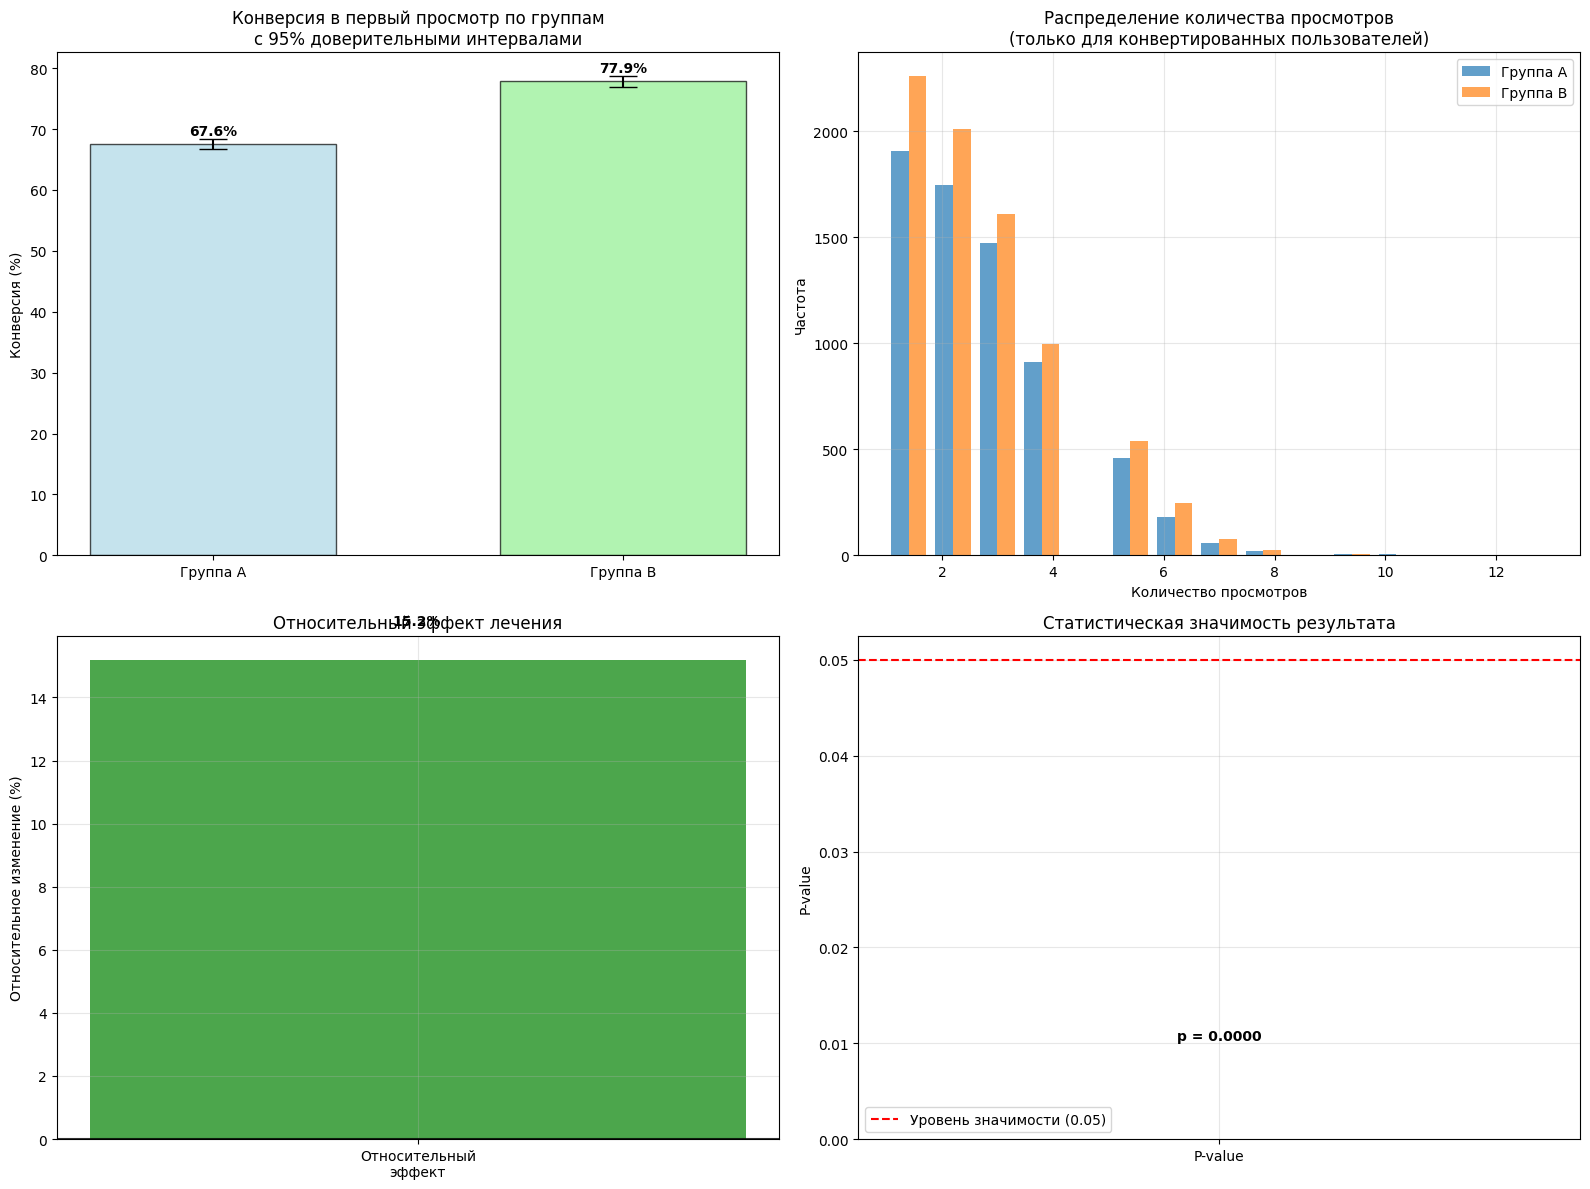

Общий вывод по A/B тесту
РЕЗУЛЬТАТ: тест успешен
Статистически значимое улучшение с достижением MDE
Рекомендация: ВНЕДРЯТЬ упрощенный интерфейс для новых пользователей


In [ ]:
def visualize_conversion_ab_results(ab_results, conversion_results):
    """Визуализация результатов A/B теста конверсии"""

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # конверсия по группам с доверительными интервалами
    groups = ['Группа A', 'Группа B']
    conversions = [conversion_results['conversion_a'], conversion_results['conversion_b']]

    # расчет ошибок для доверительных интервалов
    errors_a = [conversion_results['conversion_a'] - conversion_results['ci_a'][0],
                conversion_results['ci_a'][1] - conversion_results['conversion_a']]
    errors_b = [conversion_results['conversion_b'] - conversion_results['ci_b'][0],
                conversion_results['ci_b'][1] - conversion_results['conversion_b']]

    errors_a = [max(0, e) for e in errors_a]
    errors_b = [max(0, e) for e in errors_b]

    x_pos = np.arange(len(groups))
    bars = ax1.bar(x_pos, conversions, yerr=[errors_a, errors_b], capsize=10,
                   color=['lightblue', 'lightgreen'], edgecolor='black', alpha=0.7,
                   width=0.6)
    ax1.set_ylabel('Конверсия (%)')
    ax1.set_title('Конверсия в первый просмотр по группам\nс 95% доверительными интервалами')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(groups)

    for bar, conversion in zip(bars, conversions):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{conversion:.1f}%', ha='center', va='bottom', fontweight='bold')

    # распределение количества просмотров (только для конвертированных пользователей)
    converted_users = ab_results[ab_results['converted'] == 1]
    views_a = converted_users[converted_users['group'] == 'A']['n_views']
    views_b = converted_users[converted_users['group'] == 'B']['n_views']

    if len(views_a) > 0 and len(views_b) > 0:
        ax2.hist([views_a, views_b], bins=15, alpha=0.7, label=['Группа A', 'Группа B'])
        ax2.set_xlabel('Количество просмотров')
        ax2.set_ylabel('Частота')
        ax2.set_title('Распределение количества просмотров\n(только для конвертированных пользователей)')
        ax2.legend()
    ax2.grid(True, alpha=0.3)

    # относительный эффект
    effect = conversion_results['relative_effect']
    color = 'green' if effect > 0 else 'red'
    ax3.bar(['Относительный\nэффект'], [effect], color=color, alpha=0.7)
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.8)
    ax3.set_ylabel('Относительное изменение (%)')
    ax3.set_title('Относительный эффект лечения')
    ax3.grid(True, alpha=0.3)

    # добавляем значение эффекта
    ax3.text(-0.0008, effect + (1 if effect > 0 else -1), f'{effect:.1f}%',
             ha='center', va='bottom' if effect > 0 else 'top', fontweight='bold')

    # статистическая значимость
    p_value = conversion_results['p_value']
    significance_color = 'green' if p_value < 0.05 else 'red'

    ax4.bar(['P-value'], [p_value], color=significance_color, alpha=0.7)
    ax4.axhline(y=0.05, color='red', linestyle='--', label='Уровень значимости (0.05)')
    ax4.set_ylabel('P-value')
    ax4.set_title('Статистическая значимость результата')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # значение p-value
    ax4.text(0, p_value + 0.01, f'p = {p_value:.4f}',
             ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()


    print("Общий вывод по A/B тесту")

    if conversion_results['p_value'] < 0.05 and conversion_results['mde_achieved']:
        print("РЕЗУЛЬТАТ: тест успешен")
        print("Статистически значимое улучшение с достижением MDE")
        print("Рекомендация: ВНЕДРЯТЬ упрощенный интерфейс для новых пользователей")
    elif conversion_results['p_value'] < 0.05 and not conversion_results['mde_achieved']:
        print("РЕЗУЛЬТАТ: частичный успех")
        print("Статистически значимое улучшение, но MDE не достигнут")
        print("Рекомендация: Рассмотреть внедрение с учетом других факторов")
    else:
        print("РЕЗУЛЬТАТ: тест неудачен")
        print("Нет статистически значимого эффекта")
        print("Рекомендация: НЕ ВНЕДРЯТЬ изменения")

visualize_conversion_ab_results(ab_results, conversion_results)

### Когортный анализ результатов A/B теста

In [ ]:
def perform_cohort_analysis(ab_results, users_df):
    """"""

    # объединяем данные A/B теста с демографией пользователей
    ab_with_demographics = ab_results.merge(users_df[['user_id', 'sex', 'age', 'income', 'kids_flg']],
                                           on='user_id', how='left')
    column_mapping = {}
    for col in ab_with_demographics.columns:
        if col.endswith('_x'):
            new_col = col.replace('_x', '')
            column_mapping[col] = new_col
        elif col.endswith('_y'):
            new_col = col.replace('_y', '')
            column_mapping[col] = new_col

    if column_mapping:
        ab_with_demographics = ab_with_demographics.rename(columns=column_mapping)
        # удаляем дубликаты колонок если они есть
        ab_with_demographics = ab_with_demographics.loc[:, ~ab_with_demographics.columns.duplicated()]

    print(f"Всего записей после объединения: {len(ab_with_demographics):,}")
    print(f"Колонки в данных: {list(ab_with_demographics.columns)}")

    print("\n1. Анализ по полу:")
    try:
        sex_col = 'sex'
        if sex_col in ab_with_demographics.columns:
            sex_cohort = ab_with_demographics.groupby(['group', sex_col])['converted'].agg(['count', 'sum'])
            sex_cohort['conversion_rate'] = (sex_cohort['sum'] / sex_cohort['count']) * 100

            for sex in sex_cohort.index.get_level_values(sex_col).unique():
                if ('A', sex) in sex_cohort.index and ('B', sex) in sex_cohort.index:
                    conv_a = sex_cohort.loc[('A', sex), 'conversion_rate']
                    conv_b = sex_cohort.loc[('B', sex), 'conversion_rate']
                    effect = conv_b - conv_a
                    sex_label = 'Мужчины' if sex == 'M' else 'Женщины' if sex == 'F' else sex
                    print(f"   {sex_label}: A={conv_a:.1f}% → B={conv_b:.1f}% (Δ={effect:+.1f}%)")
        else:
            print("   Колонка 'sex' не найдена в данных")
    except Exception as e:
        print(f"   Ошибка при анализе по полу: {e}")

    print("\n2. Анализ по возрастным группам:")
    try:
        age_col = 'age'
        if age_col in ab_with_demographics.columns:
            age_cohort = ab_with_demographics.groupby(['group', age_col])['converted'].agg(['count', 'sum'])
            age_cohort['conversion_rate'] = (age_cohort['sum'] / age_cohort['count']) * 100

            # Берем все возрастные группы, которые есть в данных
            age_groups = age_cohort.index.get_level_values(age_col).unique()[:5]  # первые 5 для наглядности

            for age in age_groups:
                if ('A', age) in age_cohort.index and ('B', age) in age_cohort.index:
                    conv_a = age_cohort.loc[('A', age), 'conversion_rate']
                    conv_b = age_cohort.loc[('B', age), 'conversion_rate']
                    effect = conv_b - conv_a
                    print(f"   {age}: A={conv_a:.1f}% → B={conv_b:.1f}% (Δ={effect:+.1f}%)")
        else:
            print("   Колонка 'age' не найдена в данных")
    except Exception as e:
        print(f"   Ошибка при анализе по возрасту: {e}")

    print("\n3. Анализ по доходу:")
    try:
        income_col = 'income'
        if income_col in ab_with_demographics.columns:
            income_cohort = ab_with_demographics.groupby(['group', income_col])['converted'].agg(['count', 'sum'])
            income_cohort['conversion_rate'] = (income_cohort['sum'] / income_cohort['count']) * 100

            # берем все группы дохода, которые есть в данных
            income_groups = income_cohort.index.get_level_values(income_col).unique()[:4]  # первые 4 для наглядности

            for income in income_groups:
                if ('A', income) in income_cohort.index and ('B', income) in income_cohort.index:
                    conv_a = income_cohort.loc[('A', income), 'conversion_rate']
                    conv_b = income_cohort.loc[('B', income), 'conversion_rate']
                    effect = conv_b - conv_a
                    print(f"   {income}: A={conv_a:.1f}% → B={conv_b:.1f}% (Δ={effect:+.1f}%)")
        else:
            print("   Колонка 'income' не найдена в данных")
    except Exception as e:
        print(f"   Ошибка при анализе по доходу: {e}")


    print("\n4. Анализ по наличию детей:")
    try:
        kids_col = 'kids_flg'
        if kids_col in ab_with_demographics.columns:
            kids_cohort = ab_with_demographics.groupby(['group', kids_col])['converted'].agg(['count', 'sum'])
            kids_cohort['conversion_rate'] = (kids_cohort['sum'] / kids_cohort['count']) * 100

            for kids in kids_cohort.index.get_level_values(kids_col).unique():
                if ('A', kids) in kids_cohort.index and ('B', kids) in kids_cohort.index:
                    conv_a = kids_cohort.loc[('A', kids), 'conversion_rate']
                    conv_b = kids_cohort.loc[('B', kids), 'conversion_rate']
                    effect = conv_b - conv_a
                    kids_label = "с детьми" if kids else "без детей"
                    print(f"   {kids_label}: A={conv_a:.1f}% → B={conv_b:.1f}% (Δ={effect:+.1f}%)")
        else:
            print("   Колонка 'kids_flg' не найдена в данных")
    except Exception as e:
        print(f"   Ошибка при анализе по наличию детей: {e}")

    return ab_with_demographics

print("Когортный анализ результатов A/B теста по демографическим сегментам")
ab_with_demographics = perform_cohort_analysis(ab_results, users_df)

Когортный анализ результатов A/B теста по демографическим сегментам
Всего записей после объединения: 20,000
Колонки в данных: ['user_id', 'group', 'converted', 'n_views', 'age', 'sex', 'income', 'kids_flg']

1. Анализ по полу:
   Женщины: A=67.2% → B=77.4% (Δ=+10.3%)
   Мужчины: A=68.1% → B=78.5% (Δ=+10.5%)
   sex_unknown: A=68.1% → B=73.6% (Δ=+5.5%)

2. Анализ по возрастным группам:
   age_18_24: A=66.6% → B=78.6% (Δ=+11.9%)
   age_25_34: A=67.5% → B=77.5% (Δ=+10.0%)
   age_35_44: A=68.0% → B=78.5% (Δ=+10.5%)
   age_45_54: A=68.2% → B=77.4% (Δ=+9.2%)
   age_55_64: A=67.0% → B=76.6% (Δ=+9.6%)

3. Анализ по доходу:
   income_0_20: A=67.8% → B=71.7% (Δ=+3.9%)
   income_150_inf: A=55.0% → B=72.7% (Δ=+17.7%)
   income_20_40: A=68.3% → B=77.8% (Δ=+9.4%)
   income_40_60: A=67.0% → B=77.7% (Δ=+10.7%)

4. Анализ по наличию детей:
   без детей: A=67.6% → B=77.9% (Δ=+10.4%)
   с детьми: A=67.7% → B=77.8% (Δ=+10.1%)


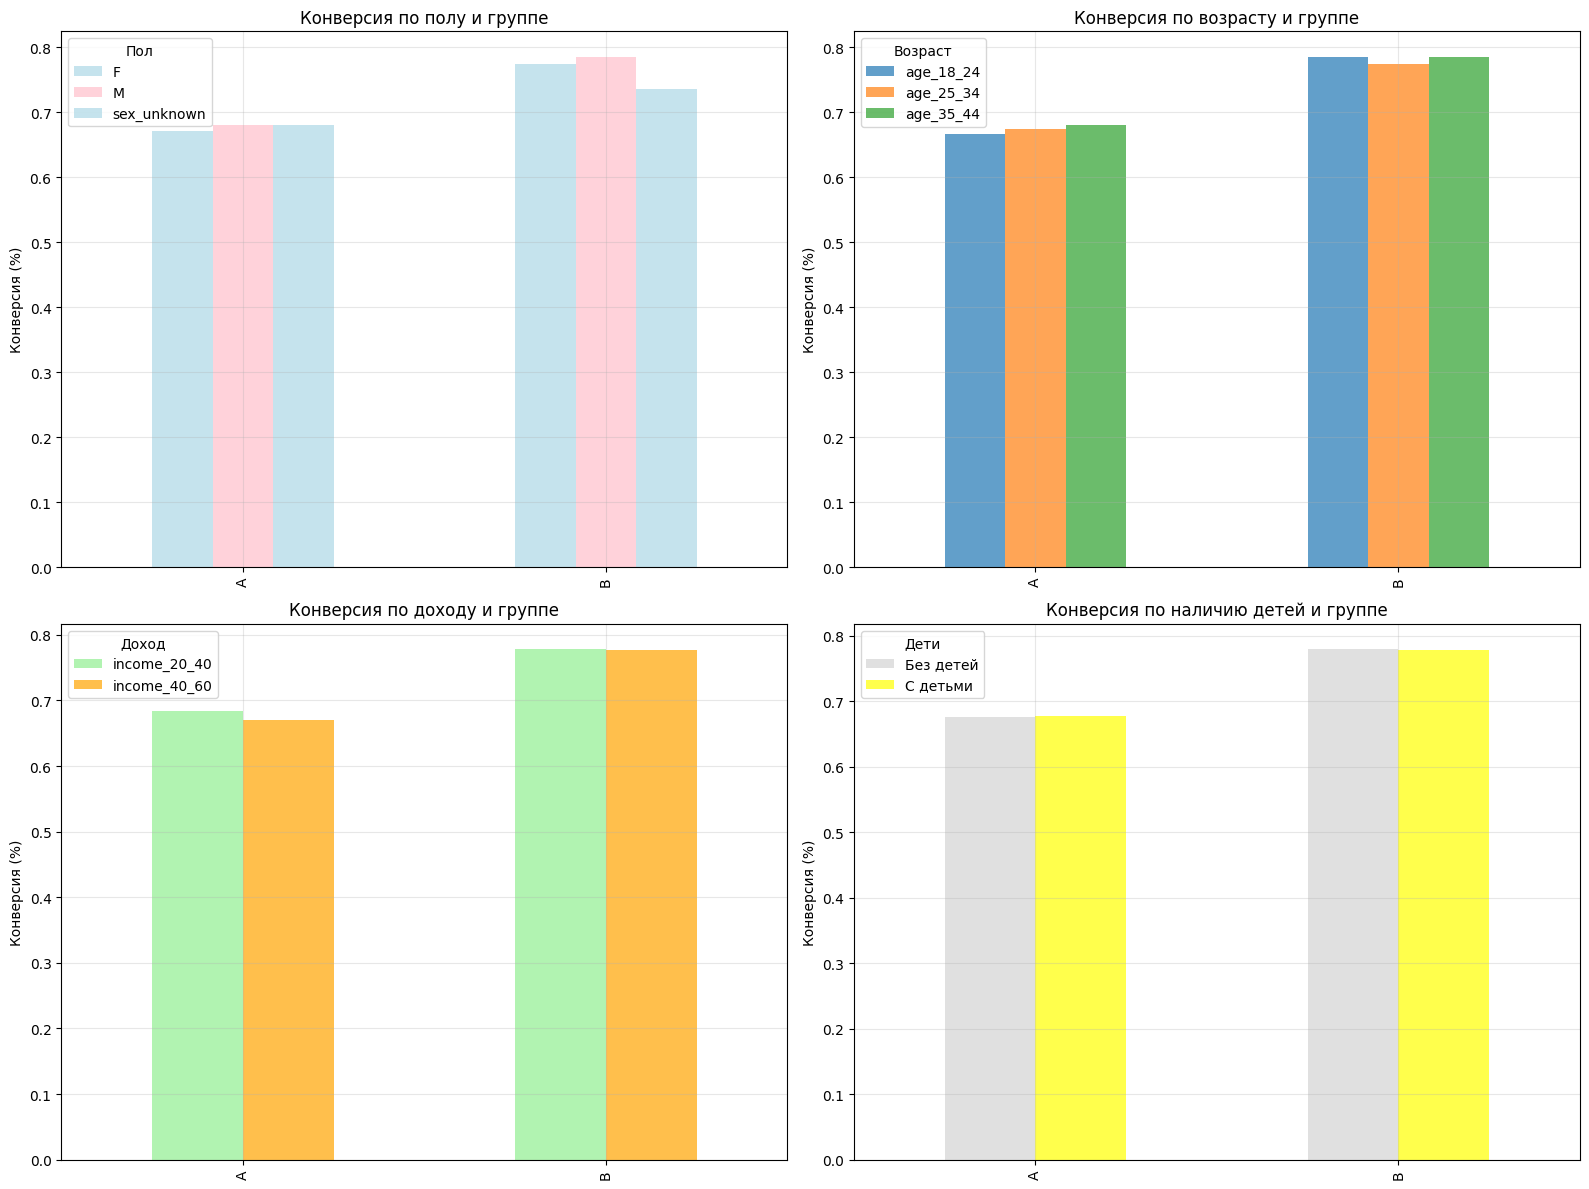

In [ ]:
def visualize_cohort_analysis(ab_with_demographics):
    """Визуализация результатов когортного анализа"""

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. визуализация по полу
    sex_cohort = ab_with_demographics.groupby(['group', 'sex'])['converted'].mean().unstack()
    sex_cohort.plot(kind='bar', ax=axes[0,0], color=['lightblue', 'pink'], alpha=0.7)
    axes[0,0].set_title('Конверсия по полу и группе')
    axes[0,0].set_ylabel('Конверсия (%)')
    axes[0,0].set_xlabel('')
    axes[0,0].legend(title='Пол')
    axes[0,0].grid(True, alpha=0.3)

    # 2. визуализация по возрасту
    age_cohort = ab_with_demographics.groupby(['group', 'age'])['converted'].mean().unstack()
    # берем только основные возрастные группы для наглядности
    main_ages = ['age_18_24', 'age_25_34', 'age_35_44']
    age_cohort_filtered = age_cohort[main_ages]
    age_cohort_filtered.plot(kind='bar', ax=axes[0,1], alpha=0.7)
    axes[0,1].set_title('Конверсия по возрасту и группе')
    axes[0,1].set_ylabel('Конверсия (%)')
    axes[0,1].set_xlabel('')
    axes[0,1].legend(title='Возраст')
    axes[0,1].grid(True, alpha=0.3)

    # 3. визуализация по доходу
    income_cohort = ab_with_demographics.groupby(['group', 'income'])['converted'].mean().unstack()
    main_incomes = ['income_20_40', 'income_40_60']
    income_cohort_filtered = income_cohort[main_incomes]
    income_cohort_filtered.plot(kind='bar', ax=axes[1,0], color=['lightgreen', 'orange'], alpha=0.7)
    axes[1,0].set_title('Конверсия по доходу и группе')
    axes[1,0].set_ylabel('Конверсия (%)')
    axes[1,0].set_xlabel('')
    axes[1,0].legend(title='Доход')
    axes[1,0].grid(True, alpha=0.3)

    # 4. визуализация по наличию детей
    kids_cohort = ab_with_demographics.groupby(['group', 'kids_flg'])['converted'].mean().unstack()
    kids_cohort.columns = ['Без детей', 'С детьми']
    kids_cohort.plot(kind='bar', ax=axes[1,1], color=['lightgray', 'yellow'], alpha=0.7)
    axes[1,1].set_title('Конверсия по наличию детей и группе')
    axes[1,1].set_ylabel('Конверсия (%)')
    axes[1,1].set_xlabel('')
    axes[1,1].legend(title='Дети')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

visualize_cohort_analysis(ab_with_demographics)

In [ ]:
def analyze_cohort_significance(ab_with_demographics):
    significant_cohorts = []
    # анализ по полу
    for sex in ['M', 'F']:
        cohort_data = ab_with_demographics[ab_with_demographics['sex'] == sex]
        conversions_a = cohort_data[cohort_data['group'] == 'A']['converted'].sum()
        conversions_b = cohort_data[cohort_data['group'] == 'B']['converted'].sum()
        n_a = len(cohort_data[cohort_data['group'] == 'A'])
        n_b = len(cohort_data[cohort_data['group'] == 'B'])

        if n_a > 0 and n_b > 0:
            z_stat, p_value = proportions_ztest([conversions_a, conversions_b], [n_a, n_b])
            conv_a = (conversions_a / n_a) * 100
            conv_b = (conversions_b / n_b) * 100
            effect = conv_b - conv_a

            is_significant = p_value < 0.05
            if is_significant:
                significant_cohorts.append(f"Пол {sex}")

            print(f"Пол {sex}: p-value={p_value:.4f} {'✓' if is_significant else '✗'}")

    # анализ по возрасту
    for age in ['age_18_24', 'age_25_34', 'age_35_44']:
        cohort_data = ab_with_demographics[ab_with_demographics['age'] == age]
        if len(cohort_data) > 0:
            conversions_a = cohort_data[cohort_data['group'] == 'A']['converted'].sum()
            conversions_b = cohort_data[cohort_data['group'] == 'B']['converted'].sum()
            n_a = len(cohort_data[cohort_data['group'] == 'A'])
            n_b = len(cohort_data[cohort_data['group'] == 'B'])

            if n_a > 10 and n_b > 10:  # минимальный размер выборки
                z_stat, p_value = proportions_ztest([conversions_a, conversions_b], [n_a, n_b])
                conv_a = (conversions_a / n_a) * 100
                conv_b = (conversions_b / n_b) * 100
                effect = conv_b - conv_a

                is_significant = p_value < 0.05
                if is_significant:
                    significant_cohorts.append(f"Возраст {age}")

                print(f"Возраст {age}: p-value={p_value:.4f} {'✓' if is_significant else '✗'}")

    print(f"\nСтатистически значимые когорты ({len(significant_cohorts)}):")
    for cohort in significant_cohorts:
        print(f"  - {cohort}")

    return significant_cohorts

print("Анализ статистической значимости эффекта по когортам")
significant_cohorts = analyze_cohort_significance(ab_with_demographics)

Анализ статистической значимости эффекта по когортам
Пол M: p-value=0.0000 ✓
Пол F: p-value=0.0000 ✓
Возраст age_18_24: p-value=0.0000 ✓
Возраст age_25_34: p-value=0.0000 ✓
Возраст age_35_44: p-value=0.0000 ✓

Статистически значимые когорты (5):
  - Пол M
  - Пол F
  - Возраст age_18_24
  - Возраст age_25_34
  - Возраст age_35_44


In [ ]:
def generate_final_recommendation(main_results, significant_cohorts):
    overall_success = main_results['p_value'] < 0.05 and main_results['mde_achieved']

    if overall_success:
        print("ОБЩИЙ РЕЗУЛЬТАТ: ТЕСТ УСПЕШЕН")
        print(f"Относительное улучшение: {main_results['relative_effect']:.1f}%")
        print(f"P-value: {main_results['p_value']:.4f}")

        if significant_cohorts:
            print(f"\nДОПОЛНИТЕЛЬНЫЕ ИНСАЙТЫ:")
            print("Эффект статистически значим в следующих когортах:")
            for cohort in significant_cohorts:
                print(f"  ✓ {cohort}")
            print("\nРекомендация: ВНЕДРЯТЬ изменения для всей аудитории")
        else:
            print("\nЭффект равномерный по всем когортам")
            print("Рекомендация: ВНЕДРЯТЬ изменения для всей аудитории")

    else:
        print("ОБЩИЙ РЕЗУЛЬТАТ: ТЕСТ НЕ УСПЕШЕН")

        if significant_cohorts:
            print(f"\nНО ВЫЯВЛЕНЫ УСПЕШНЫЕ СЕГМЕНТЫ:")
            print("Статистически значимое улучшение в следующих когортах:")
            for cohort in significant_cohorts:
                print(f"  ✓ {cohort}")
            print("\nРекомендация: Рассмотреть ВНЕДРЕНИЕ для выявленных сегментов")
        else:
            print("\nСтатистически значимых эффектов не выявлено ни в одной когорте")
            print("Рекомендация: НЕ ВНЕДРЯТЬ изменения")

    print("\nСЛЕДУЮЩИЕ ШАГИ:")
    if significant_cohorts and not overall_success:
        print("1. Провести дополнительный тест для подтверждения эффекта в выявленных сегментах")
        print("2. Разработать таргетированную стратегию внедрения")
    elif overall_success:
        print("1. Запланировать постепенное внедрение для всей аудитории")
        print("2. Мониторить ключевые метрики после внедрения")

print("Генерация финальной рекомендации с учетом когортного анализа")
generate_final_recommendation(conversion_results, significant_cohorts)

Генерация финальной рекомендации с учетом когортного анализа
ОБЩИЙ РЕЗУЛЬТАТ: ТЕСТ УСПЕШЕН
Относительное улучшение: 15.2%
P-value: 0.0000

ДОПОЛНИТЕЛЬНЫЕ ИНСАЙТЫ:
Эффект статистически значим в следующих когортах:
  ✓ Пол M
  ✓ Пол F
  ✓ Возраст age_18_24
  ✓ Возраст age_25_34
  ✓ Возраст age_35_44

Рекомендация: ВНЕДРЯТЬ изменения для всей аудитории

СЛЕДУЮЩИЕ ШАГИ:
1. Запланировать постепенное внедрение для всей аудитории
2. Мониторить ключевые метрики после внедрения


### Интерактивная демонстрация A/B теста с ROI анализом

In [ ]:
def interactive_ab_test_with_roi():
    """Интерактивная демонстрация A/B теста с ROI анализом"""

    style = {'description_width': '200px'}
    layout = widgets.Layout(width='400px')

    # основные параметры теста
    sample_size = widgets.IntSlider(
        value=10000,
        min=1000,
        max=50000,
        step=1000,
        description='Размер выборки на группу:',
        style=style,
        layout=layout
    )

    baseline_conversion = widgets.FloatSlider(
        value=67.6,
        min=50,
        max=90,
        step=0.5,
        description='Базовая конверсия (%):',
        style=style,
        layout=layout
    )

    expected_improvement = widgets.FloatSlider(
        value=15.0,
        min=1.0,
        max=30.0,
        step=0.5,
        description='Ожидаемое улучшение (%):',
        style=style,
        layout=layout
    )

    confidence_level = widgets.FloatSlider(
        value=0.95,
        min=0.90,
        max=0.99,
        step=0.01,
        description='Уровень доверия:',
        style=style,
        layout=layout
    )

    # бизнес-метрики для ROI
    arpu = widgets.FloatSlider(
        value=500,
        min=100,
        max=2000,
        step=50,
        description='ARPU (руб на пользователя):',
        style=style,
        layout=layout
    )

    development_cost = widgets.IntSlider(
        value=250000,
        min=50000,
        max=1000000,
        step=50000,
        description='Стоимость разработки (руб):',
        style=style,
        layout=layout
    )

    monthly_users = widgets.IntSlider(
        value=100000,
        min=10000,
        max=500000,
        step=10000,
        description='Ежемесячных пользователей:',
        style=style,
        layout=layout
    )

    run_button = widgets.Button(
        description='ЗАПУСТИТЬ A/B ТЕСТ С ROI',
        button_style='success',
        layout=widgets.Layout(width='220px', height='40px')
    )

    output = widgets.Output()

    def on_run_button_clicked(b):
        with output:
            clear_output()
            run_interactive_test_with_roi(
                sample_size.value,
                baseline_conversion.value,
                expected_improvement.value,
                confidence_level.value,
                arpu.value,
                development_cost.value,
                monthly_users.value
            )

    run_button.on_click(on_run_button_clicked)

    print("ИНТЕРAКTИВНЫЙ A/B ТЕСТ С ROI АНАЛИЗОМ")
    print("Настройте параметры и нажмите кнопку для запуска теста:")

    display(widgets.VBox([
        sample_size,
        baseline_conversion,
        expected_improvement,
        confidence_level,
        widgets.HTML("<b>Бизнес-метрики для ROI:</b>"),
        arpu,
        development_cost,
        monthly_users,
        run_button,
        output
    ]))

def run_interactive_test_with_roi(sample_size, baseline_conv, improvement, confidence, arpu, dev_cost, monthly_users):
    """Запуск интерактивного A/B теста с расчетом ROI"""

    alpha = 1 - confidence

    print("ПАРАМЕТРЫ ТЕСТА:")
    print(f"Размер выборки: {sample_size:,} на группу")
    print(f"Базовая конверсия: {baseline_conv:.1f}%")
    print(f"Ожидаемое улучшение: {improvement:.1f}%")
    print(f"Уровень доверия: {confidence:.0%}")
    print(f"ARPU: {arpu:,.0f} руб")
    print(f"Стоимость разработки: {dev_cost:,.0f} руб")
    print(f"Ежемесячных пользователей: {monthly_users:,}")

    required_size = calculate_sample_size(baseline_conv, improvement, alpha, 0.8)
    print("РАСЧЕТ РАЗМЕРА ВЫБОРКИ:")
    print(f"Требуется на группу: {required_size:,} пользователей")
    print(f"Фактический размер: {sample_size:,} пользователей")
    print(f"{'Достаточно' if sample_size >= required_size else 'Может быть недостаточно'}")

    print("СИМУЛЯЦИЯ A/B ТЕСТА...")
    np.random.seed(42)

    n_users = sample_size * 2
    groups = np.random.choice(['A', 'B'], size=n_users)

    conversions = []
    for i, group in enumerate(groups):
        if group == 'A':
            prob = baseline_conv / 100 + np.random.normal(0, 0.02)
        else:
            improved_conv = baseline_conv * (1 + improvement/100)
            prob = improved_conv / 100 + np.random.normal(0, 0.02)

        prob = max(0.01, min(0.99, prob))
        converted = np.random.binomial(1, prob)
        conversions.append(converted)

    ab_results_sim = pd.DataFrame({
        'user_id': range(n_users),
        'group': groups,
        'converted': conversions
    })

    print("СТАТИСТИЧЕСКИЙ АНАЛИЗ:")
    group_a = ab_results_sim[ab_results_sim['group'] == 'A']['converted']
    group_b = ab_results_sim[ab_results_sim['group'] == 'B']['converted']

    conv_a = group_a.mean() * 100
    conv_b = group_b.mean() * 100
    absolute_effect = conv_b - conv_a
    relative_effect = (absolute_effect / conv_a) * 100

    print(f"Группа A: {conv_a:.2f}%")
    print(f"Группа B: {conv_b:.2f}%")
    print(f"Абсолютный эффект: {absolute_effect:+.2f}%")
    print(f"Относительный эффект: {relative_effect:+.2f}%")

    t_stat, p_value = stats.ttest_ind(group_a, group_b)

    print("СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:")
    print(f"P-value: {p_value:.4f}")
    print(f"Уровень значимости: α = {alpha:.3f}")
    print(f"Статистически значимо: {'ДА' if p_value < alpha else 'НЕТ'}")

    # РАСЧЕТ ROI
    print("РОССЧЕТ ROI:")

    # текущий доход
    current_converted_users = monthly_users * (baseline_conv / 100)
    current_revenue = current_converted_users * arpu

    # прогнозируемый доход после улучшения
    new_conversion = baseline_conv + absolute_effect
    new_converted_users = monthly_users * (new_conversion / 100)
    new_revenue = new_converted_users * arpu

    # дополнительный доход
    additional_revenue = new_revenue - current_revenue
    annual_additional_revenue = additional_revenue * 12

    # расчет ROI
    roi = (annual_additional_revenue / dev_cost) * 100 if dev_cost > 0 else float('inf')
    payback_period = dev_cost / additional_revenue if additional_revenue > 0 else float('inf')
    if payback_period < 0.1:
      payback_days = payback_period * 30
      print(f"Окупаемость: {payback_days:.1f} дней")
    else:
      print(f"Окупаемость: {payback_period:.1f} месяцев")


    print(f"Текущий доход в месяц: {current_revenue:,.0f} руб")
    print(f"Прогнозируемый доход: {new_revenue:,.0f} руб")
    print(f"Дополнительный доход в месяц: {additional_revenue:,.0f} руб")
    print(f"Дополнительный доход в год: {annual_additional_revenue:,.0f} руб")
    print(f"ROI: {roi:.1f}%")
    print(f"Окупаемость: {payback_period:.1f} месяцев")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

    # конверсия по группам
    groups_data = [conv_a, conv_b]
    bars = ax1.bar(['Группа A', 'Группа B'], groups_data,
                   color=['lightblue', 'lightgreen'], alpha=0.7)
    ax1.set_ylabel('Конверсия (%)')
    ax1.set_title('Конверсия по группам')
    ax1.grid(True, alpha=0.3)
    for bar, value in zip(bars, groups_data):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    # статистическая значимость
    significance_data = [p_value, alpha]
    bars2 = ax2.bar(['P-value', 'Уровень значимости'], significance_data,
                   color=['red', 'green'], alpha=0.7)
    ax2.set_ylabel('Значение')
    ax2.set_title('Статистическая значимость')
    ax2.grid(True, alpha=0.3)
    for bar, value in zip(bars2, significance_data):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    # финансовые метрики
    financial_metrics = ['Текущий доход', 'Прогноз доход', 'Доп. доход']
    financial_values = [current_revenue/1000, new_revenue/1000, additional_revenue/1000]
    bars3 = ax3.bar(financial_metrics, financial_values,
                   color=['gray', 'blue', 'green'], alpha=0.7)
    ax3.set_ylabel('Доход (тыс. руб)')
    ax3.set_title('Финансовые показатели (месяц)')
    ax3.grid(True, alpha=0.3)
    for bar, value in zip(bars3, financial_values):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{value:,.0f}т', ha='center', va='bottom', fontweight='bold')

    #  ROI и окупаемость
    roi_metrics = ['ROI', 'Окупаемость']
    roi_values = [min(roi, 1000), min(payback_period, 36)]
    colors_roi = ['green' if roi > 100 else 'orange' if roi > 0 else 'red',
                 'green' if payback_period < 12 else 'orange' if payback_period < 24 else 'red']
    bars4 = ax4.bar(roi_metrics, roi_values, color=colors_roi, alpha=0.7)
    ax4.set_ylabel('ROI (%) / Окупаемость (мес)')
    ax4.set_title('Экономическая эффективность')
    ax4.grid(True, alpha=0.3)
    for bar, value, metric in zip(bars4, roi_values, roi_metrics):
        height = bar.get_height()
        if metric == 'ROI':
            ax4.text(bar.get_x() + bar.get_width()/2., height + 10,
                    f'{value:.0f}%', ha='center', va='bottom', fontweight='bold')
        else:
            ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{value:.1f} мес', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("БИЗНЕС-РЕКОМЕНДАЦИЯ С ROI АНАЛИЗОМ:")

    statistical_success = p_value < alpha
    economic_success = roi > 100 and payback_period < 12

    if statistical_success and economic_success:
        print("ВНЕДРЯТЬ ИЗМЕНЕНИЯ")
        print(f"Статистически значимое улучшение ({relative_effect:.1f}%)")
        print(f"Высокая экономическая эффективность (ROI: {roi:.0f}%)")
        print(f"Быстрая окупаемость ({payback_period:.1f} месяцев)")
        print(f"Годовой прирост: {annual_additional_revenue:,.0f} руб")

    elif statistical_success and not economic_success:
        print("РАССМОТРЕТЬ С ОСТОРОЖНОСТЬЮ")
        print(f"Статистически значимое улучшение ({relative_effect:.1f}%)")
        print(f"Но низкая экономическая эффективность (ROI: {roi:.0f}%)")
        print(f"Долгая окупаемость ({payback_period:.1f} месяцев)")

    elif not statistical_success and economic_success:
        print("ПРОДОЛЖИТЬ ИССЛЕДОВАНИЕ")
        print(f"Нет статистической значимости (p-value: {p_value:.4f})")
        print(f"Но перспективная экономика (ROI: {roi:.0f}%)")

    else:
        print("НЕ ВНЕДРЯТЬ")
        print(f"Нет статистической значимости (p-value: {p_value:.4f})")
        print(f"Низкая экономическая эффективность (ROI: {roi:.0f}%)")

    print("СЛЕДУЮЩИЕ ШАГИ:")
    if statistical_success and economic_success:
        print("Запланировать постепенное внедрение")
        print("Мониторить ключевые метрики после запуска")
    elif statistical_success:
        print("Проанализировать возможности снижения стоимости разработки")
        print("Рассчитать долгосрочный LTV пользователей")
    else:
        print("Увеличить размер выборки для достижения мощности")
        print("Пересмотреть гипотезу и метрики")

interactive_ab_test_with_roi()

ИНТЕРAКTИВНЫЙ A/B ТЕСТ С ROI АНАЛИЗОМ
Настройте параметры и нажмите кнопку для запуска теста:
